<a href="https://colab.research.google.com/github/thiru2981/Weather-Forecasting/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<em><b>Objective :</b> Weather forecasting is simply the prediction of future weather based on different parameters of the past like temperature, humidity, dew, wind speed and direction, precipitation, Haze and contents of air, Solar and terrestrial radiation etc. Weather forecast is an essential factor affecting people’s lives. Weather forecast notices are important because they can be used to prevent destruction of life and environment.</em>

# **Importing Libraries and Loading Dataset**

In [ ]:
# Importing the fundamental libraries of data science

import pandas as pd                       # For Data Analysis and Preprocessing
import numpy as np                        # For mathematical operations on data
import matplotlib.pyplot as plt           # For Visualization and setting graph elements
import seaborn as sns                     # Consists of easy and interactive statistical graphics

## **Data Collection & Analysis**



In [ ]:
url = "/content/weather.csv"
df = pd.read_csv(url)                     # Reading the dataset

df.head()                            # Printing the first 5 rows of the dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.shape                          # Returns the number of rows and number of columns of dataset

(96453, 12)

In [ ]:
df.dtypes

,0
Formatted Date,object
Summary,object
Precip Type,object
Temperature (C),float64
Apparent Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
Wind Bearing (degrees),int64
Visibility (km),float64
Loud Cover,int64


In [ ]:
df.columns                        # Returns the name of columns of dataset

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

# **Exploratory Data Analysis**

In [ ]:
df.info()           # to get a consice summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


We observe that 'Formatted Date' column has datatype 'Object'. This doesn't helps us, as python has not recognised it as datetime type.
So, we will change the datatype of 'Formatted Date' column.

In [ ]:
# Converts arguement to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Checking the datatype of the column by using dtype attribute
df['Formatted Date'].dtype

datetime64[ns, UTC]

In [ ]:
import datetime as dt

# Extracting Date (yyyy-mm-dd) from 'Formatted Date' column
df['Date'] = df['Formatted Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])

# Extracting Time (hh) from 'Formatted Date' column (Note: We are only extracting hour because all observations have {mm-ss} as {00-00})
df['Time'] = df['Formatted Date'].dt.hour

df.drop(columns='Formatted Date', inplace=True)                 # Now, we drop the Formatted Date column

In [ ]:
# We want to place the recently created columns-'Date' and 'Time' as first two columns in our DataFrame
# So, first we pop them out and insert them into 0th and 1th position respectively

first_column = df.pop('Date')
second_column = df.pop('Time')

df.insert(0, 'Date', first_column)
df.insert(1, 'Time', second_column)

In [ ]:
df.head()

,Date,Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31,22,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31,23,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01,0,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01,1,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01,2,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.describe()         # Used to describe various statistical measures for quantitative columns
                      # Mean, Median(Q2) describes the characteristic of distribution of column
                      # 25% (Q1),  50% (Q2) and 75 (Q3) are Quartiles of the features.
                      # std is Standard Deviation i.e. depicts spread  of the distribution
                      # min and max are known to everybody :)

,Date,Time,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,2011-07-02 08:10:33.311560960,11.499891,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
min,2005-12-31 00:00:00,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2008-10-01 00:00:00,6.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,2011-07-02 00:00:00,11.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,2014-04-02 00:00:00,17.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,2016-12-31 00:00:00,23.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000
std,NaN,6.922049,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906


In [ ]:
df.isna().sum()             # Returns the sum of rows that contains null values for each column

,0
Date,0
Time,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0


In [ ]:
# Dropping the 'Loud Cover' Column as it contains all rows with value '0'.
# It will not add any value to the model

df.drop('Loud Cover', axis=1, inplace=True)

We will predict Summary, Temperature and Precip Type features for our project.

*   Summary is Categorical variable; so it would require classification algorithms.
*   Temperature is a quantitative variable; hence we would use multiple regression.
*   Precip Type is also a categorical variable; so we will use classification algorithm









**EDA on Temperature Feature**

In [ ]:
month = df['Date'].dt.month

monthly_avg = df.groupby(month)['Temperature (C)'].mean()

In [ ]:
year = df['Date'].dt.year

annual_avg = df.groupby(year)['Temperature (C)'].mean()

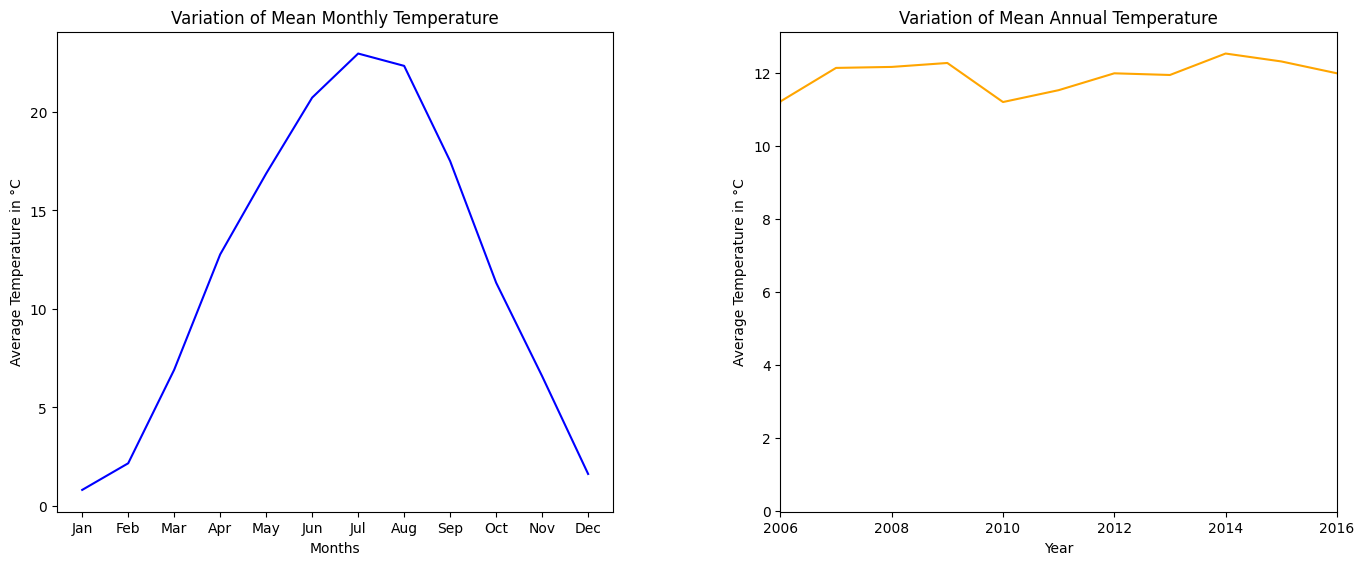

In [ ]:
plt.subplots_adjust(left=0, right=2, bottom=0, top=1, wspace=0.3, hspace=0.1)

plt.subplot(1, 2, 1)
month_abb = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.lineplot(x=month_abb, y=monthly_avg.values, color='blue', linestyle="-")
plt.xlabel('Months')
plt.ylabel("Average Temperature in \N{DEGREE SIGN}C")
plt.title('Variation of Mean Monthly Temperature')

plt.subplot(1, 2, 2)
sns.lineplot(x=annual_avg.index, y=annual_avg.values, color='orange', linestyle="solid")
plt.xlim([2006, 2016])
plt.xlabel('Year')
plt.ylabel("Average Temperature in \N{DEGREE SIGN}C")
plt.title('Variation of Mean Annual Temperature')

plt.show()

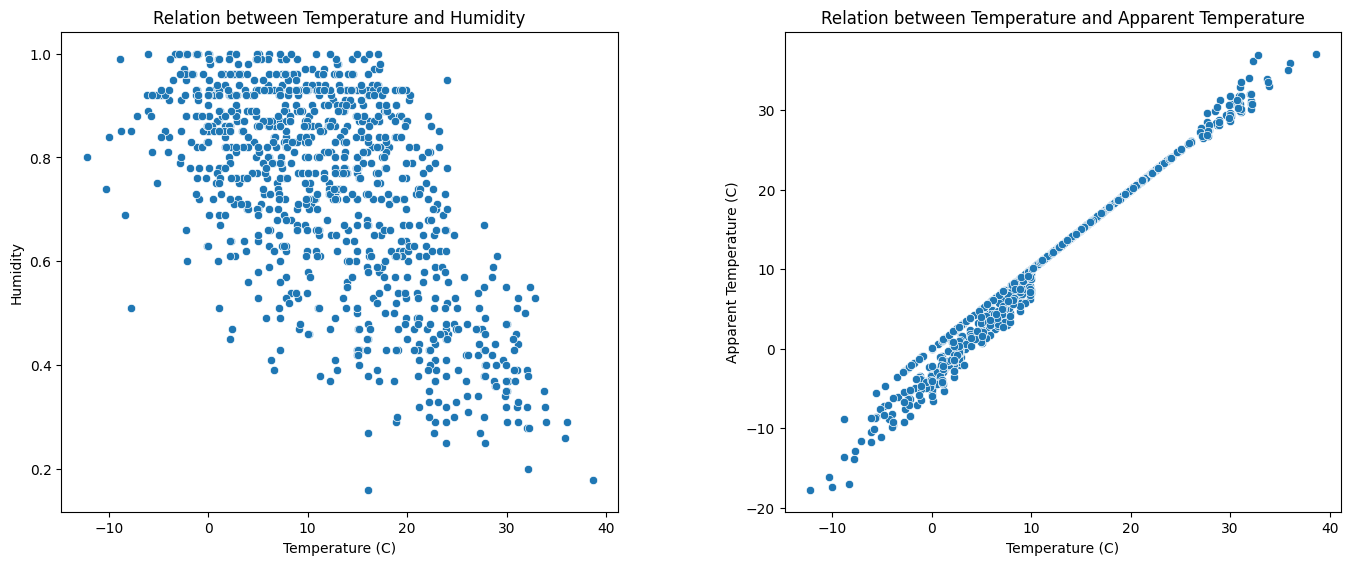

In [ ]:
# To visualize the relation the relation between two columns, we will plot scatterplot
# Here, our predictor variable for Linear Regression model is Temperature

# used to adjust the subplot size and spacing between them
plt.subplots_adjust(left=0, right=2, bottom=0, top=1, wspace=0.3, hspace=0.1)

# First subplot - Relation between Temperature and Humidity
plt.subplot(1,2,1)
plt.title('Relation between Temperature and Humidity')
sns.scatterplot(data=df.sample(1000, random_state=1), x='Temperature (C)', y='Humidity')

# Second subplot - Relation between Temperature and Apparent Temperature
plt.subplot(1,2,2)
plt.title('Relation between Temperature and Apparent Temperature')
sns.scatterplot(data=df.sample(1000, random_state=1), x='Temperature (C)', y='Apparent Temperature (C)')

plt.show()

In [ ]:
# To begin with, we will check the number of different categories in Summary feature

df['Summary'].nunique()

27

In [ ]:
#  Since, we get 27 categories, lets first check the occurence of each of the categories;
#  to if there are categories who have least occurence (they may be outliers/noise) '''

df['Summary'].value_counts()

,count
Summary,
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


In [ ]:
df['Precip Type'].nunique()

2

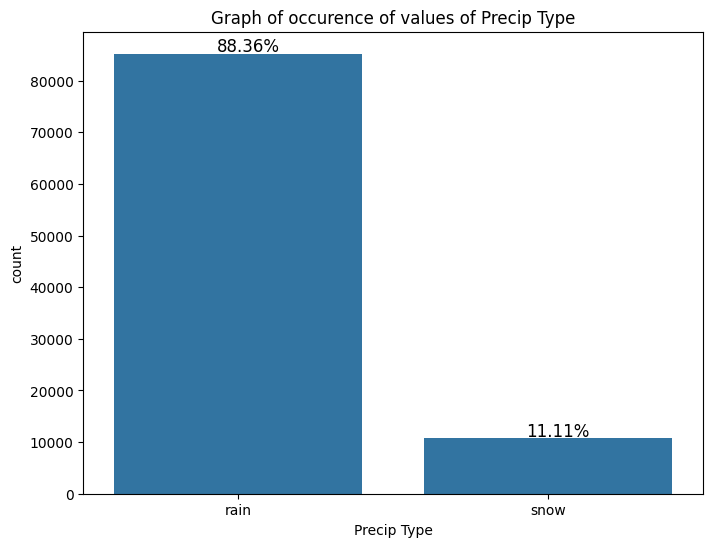

In [ ]:
plt.figure(figsize=(8,6))
precip = sns.countplot(x=df['Precip Type'])
plt.title('Graph of occurence of values of Precip Type')

for p in precip.patches:
  txt = str(round(p.get_height()/df.shape[0]*100, 2)) + '%'
  txt_x = p.get_x() + p.get_width()/2 -0.07
  txt_y = p.get_height()+400
  precip.text(txt_x, txt_y, txt, size=12)

plt.show()

In [ ]:
df['Precip Type'].dtype


dtype('O')

In [ ]:
df['Precip Type'] = pd.to_numeric(df['Precip Type'], errors='coerce')

In [ ]:
df.groupby('Precip Type').mean()

,Date,Time,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Precip Type,,,,,,,,,,,


# **Data Preprocessing**

First we will perform preprocess the main response variable-'Summary' Feature.

**Summary Feature**

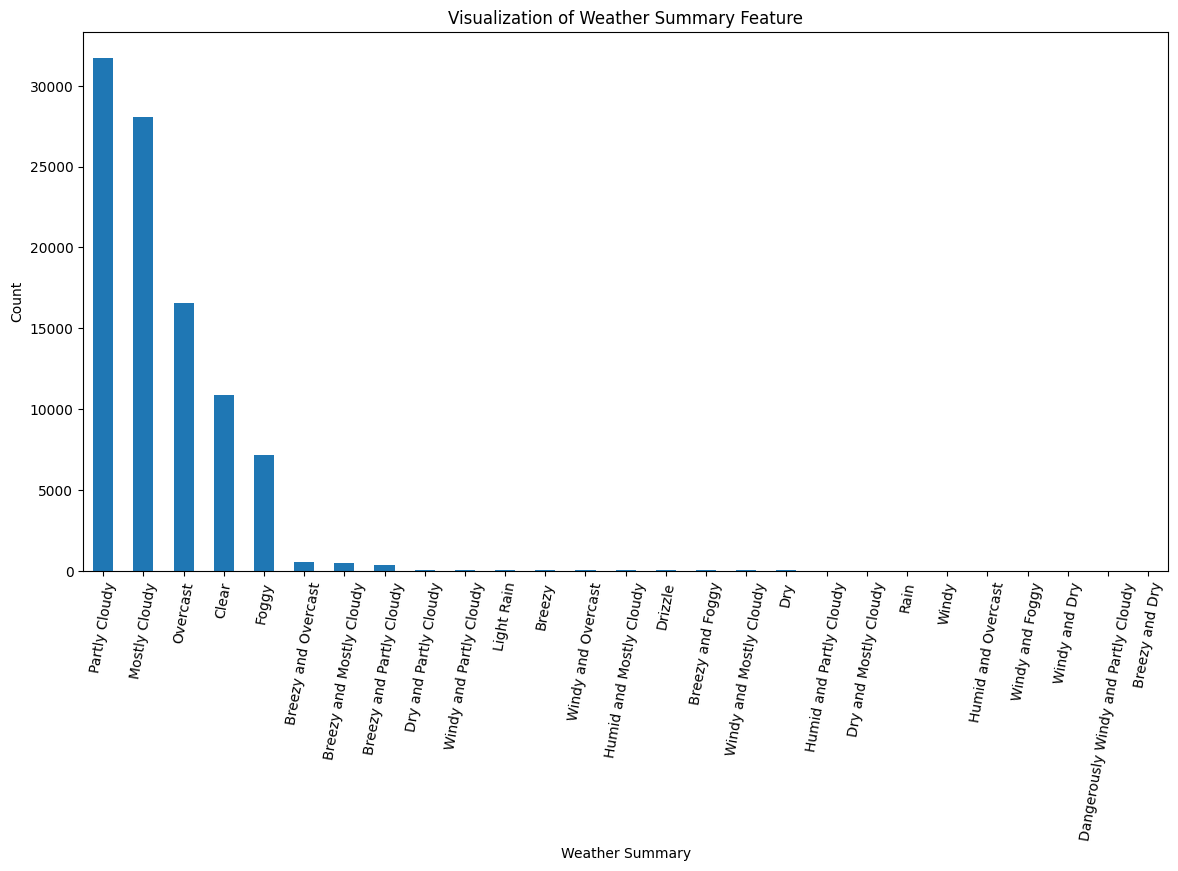

In [ ]:
plt.figure(figsize=(14,7))

df['Summary'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Weather Summary')
plt.title('Visualization of Weather Summary Feature')
plt.xticks(rotation=80)
plt.show()

By the above visualization plot, we can infer that most of the data lies in the first five categories of Weather Summary Feature. The other categories have infinitesimal occurences. Since, this is a qualitative feature, we must clean this rare occuring categories from out dataset

In [ ]:
# We will first estimate their percentage of occurence within the dataset.

# The below code uses "Boolean Masking" technique of python.
# Here, we will not consider the rows have ['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy' and 'Clear']
df[(df['Summary']!='Partly Cloudy') & (df['Summary']!='Mostly Cloudy') &
     (df['Summary']!='Overcast') & (df['Summary']!='Foggy') & (df['Summary']!='Clear')].shape[0]/df.shape[0]*100

2.0642178055633313

Only 2% of our data not lies in the top five categories of Summary Feature.

But, instead of dropping them all, we observe that there are categories which are intersection between two weather summary. Like, 'Breezy and Partly Cloudy' is the data recorded when weather was both Breezy and Partly Cloudy. Instead of dropping this observations (rows), we will add their occurence to 'Partly Cloudy'

Similarly, with other categories as well.

In [ ]:
# storing the index for unclean data for preprocessing
uncleanData_index = df[(df['Summary']!='Partly Cloudy') & (df['Summary']!='Mostly Cloudy') &
     (df['Summary']!='Overcast') & (df['Summary']!='Foggy') & (df['Summary']!='Clear')].index

In [ ]:
# Creating a copy of dataset
df_preprocessed = df.copy()

# Iterating through the unclean_data index
for row in uncleanData_index:

      # Using string matching technique
      if 'Partly Cloudy' in df_preprocessed['Summary'][row]:
          df_preprocessed.loc[row, 'Summary'] = 'Partly Cloudy'

      elif 'Mostly Cloudy' in df_preprocessed['Summary'][row]:
          df_preprocessed.loc[row, 'Summary'] = 'Mostly Cloudy'

      elif 'Overcast' in df_preprocessed['Summary'][row]:
          df_preprocessed.loc[row, 'Summary'] = 'Overcast'

      elif 'Foggy' in df_preprocessed['Summary'][row]:
          df_preprocessed.loc[row, 'Summary'] = 'Foggy'

In [ ]:
# We check that preprocessed data has retained all the rows of the original dataset

df_preprocessed.shape

(96453, 12)

In [ ]:
df_preprocessed['Summary'].nunique()

13

In [ ]:
df_preprocessed['Summary'].value_counts()

Summary
Partly Cloudy     32290
Mostly Cloudy     28699
Overcast          17177
Clear             10890
Foggy              7187
Light Rain           63
Breezy               54
Drizzle              39
Dry                  34
Rain                 10
Windy                 8
Windy and Dry         1
Breezy and Dry        1
Name: count, dtype: int64

In [ ]:
uncleanData_index = df_preprocessed[(df_preprocessed['Summary']!='Partly Cloudy') & (df_preprocessed['Summary']!='Mostly Cloudy') &
     (df_preprocessed['Summary']!='Overcast') & (df_preprocessed['Summary']!='Foggy') & (df_preprocessed['Summary']!='Clear')].index

In [ ]:
uncleanData_index.shape[0]/df.shape[0]*100

0.21772262138036141

In [ ]:
df_preprocessed.drop(index=uncleanData_index, inplace=True)

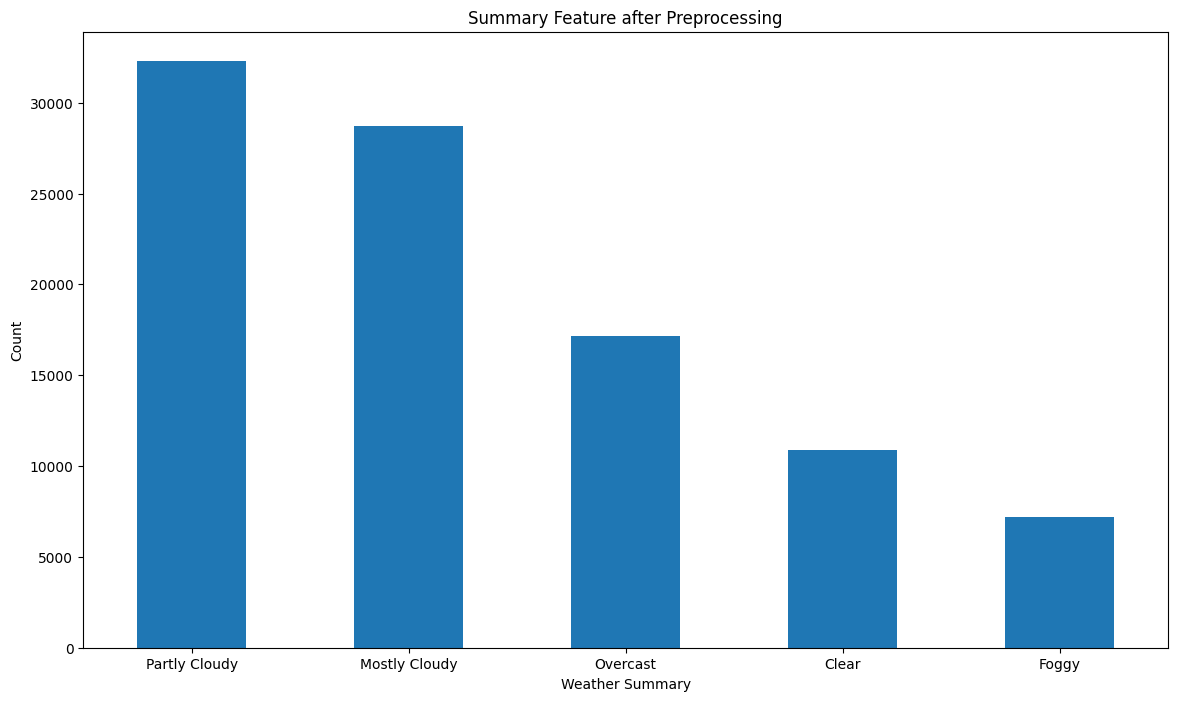

In [ ]:
plt.figure(figsize=(14,8))

df_preprocessed['Summary'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Weather Summary')
plt.title('Summary Feature after Preprocessing')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96243 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      96243 non-null  datetime64[ns]
 1   Time                      96243 non-null  int32         
 2   Summary                   96243 non-null  object        
 3   Precip Type               0 non-null      float64       
 4   Temperature (C)           96243 non-null  float64       
 5   Apparent Temperature (C)  96243 non-null  float64       
 6   Humidity                  96243 non-null  float64       
 7   Wind Speed (km/h)         96243 non-null  float64       
 8   Wind Bearing (degrees)    96243 non-null  int64         
 9   Visibility (km)           96243 non-null  float64       
 10  Pressure (millibars)      96243 non-null  float64       
 11  Daily Summary             96243 non-null  object        
dtypes: datetime64[ns](1), f

**Studying Coorelation between Features**

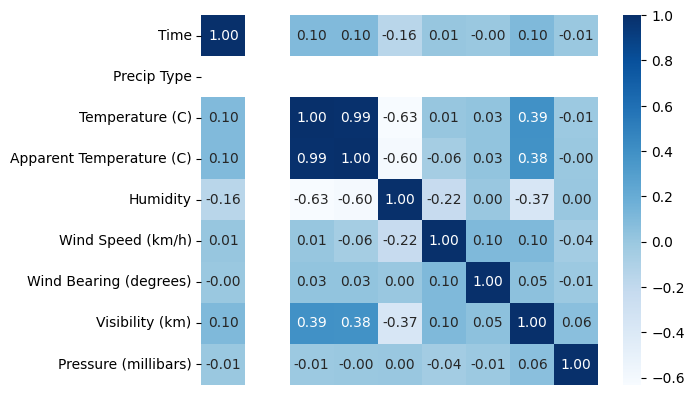

In [ ]:
df_preprocessed_numeric = df_preprocessed.select_dtypes(include=['number'])
sns.heatmap(data=df_preprocessed_numeric.corr(), annot=True, fmt='.2f', cmap='Blues', xticklabels=False)
plt.show()

Temperature has very strong positive correlation with 'Apparent Temprature'<br />&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
                moderate negative correlation with 'Humidity'<br />&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
                moderate positive correaltion with 'Visibility'<br />&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
                no correlation with 'Wind Speed', 'Wind Bearing' and 'Pressure'

**Precip Type Feature**

In [ ]:
df_preprocessed.isna().sum()

,0
Date,0
Time,0
Summary,0
Precip Type,96243
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0


In [ ]:
precip_na_index = df_preprocessed.loc[pd.isna(df_preprocessed['Precip Type']), :].index

for row in precip_na_index:
    if df_preprocessed.loc[row, 'Temperature (C)']<=0:
        df_preprocessed.loc[row, 'Precip Type'] = 'snow'
    else :
        df_preprocessed.loc[row, 'Precip Type'] = 'rain'

df_preprocessed['Precip Type'].isna().sum()

<ipython-input-38-753b5fd65710>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'rain' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_preprocessed.loc[row, 'Precip Type'] = 'rain'


0

# Data Modelling

In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report
import joblib

**Linear Regression - Predicting Temperature**

In [ ]:
## Model Selection - Splitting Training and Test Dataset
x = df_preprocessed.loc[:, ['Apparent Temperature (C)', 'Humidity']]
y = df_preprocessed.loc[:, 'Temperature (C)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
## Building the Model
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()

lrmodel.fit(x_train, y_train)
temp_predict = lrmodel.predict(x_test)

In [ ]:
## Linear regression Model Evaluation
r2_value = r2_score(temp_predict, y_test)
print("R-Squared Score of the Linear Regression Model is", round(r2_value, 4))

mean_sq_error = mean_squared_error(temp_predict, y_test)
print("Mean Square Error of the Linear Regression Model is", round(mean_sq_error, 2))

R-Squared Score of the Linear Regression Model is 0.9871
Mean Square Error of the Linear Regression Model is 1.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


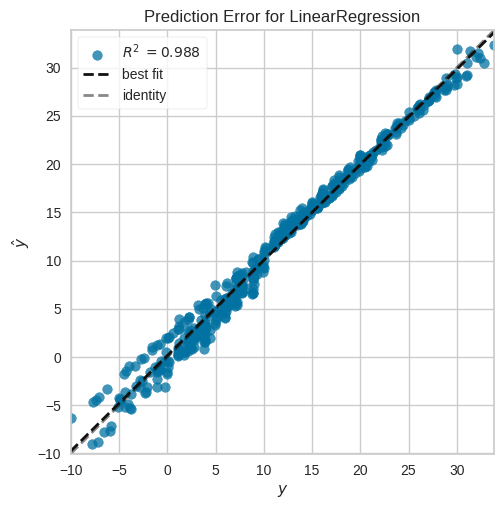

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
## Visualizing the Prediction
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lrmodel).fit(x_train, y_train)
visualizer.score(x_test.sample(500, random_state=1), y_test.sample(500, random_state=1))

visualizer.poof()

In [ ]:
user_input_temp = int(input('Enter the temperature in celcius : '))
user_input_humid = float(input('Enter the humidity : '))

result1 = lrmodel.predict([[user_input_temp, user_input_humid]])
print("Expected Tempearture is {}\N{DEGREE SIGN}C".format(round(result1[0], 2)))

Enter the temperature in celcius : 78
Enter the humidity : 77
Expected Tempearture is -130.99°C


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Logistic Regression - Predicting the Precipitation Type**

In [ ]:
## Encoding the Categorical Variables
lb = LabelBinarizer()

df_preprocessed['Precip Type Binary'] = lb.fit_transform(df_preprocessed['Precip Type'])
df_preprocessed['Precip Type Binary'].value_counts()

,count
Precip Type Binary,
0,85543
1,10700


In [ ]:
## Splitting Dataset
x = df_preprocessed.loc[:, ['Temperature (C)', 'Humidity', 'Visibility (km)']]
y = df_preprocessed.loc[:, 'Precip Type Binary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
## Building the Model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
precip_predict = logmodel.predict(x_test)


## Logistic Regression Model Evaluation
print("R-Squared Score of the Logistic Regression Model is", round(r2_score(precip_predict, y_test), 4))

print("Accuracy is", round(accuracy_score(y_test, precip_predict), 4))

R-Squared Score of the Logistic Regression Model is 0.9799
Accuracy is 0.998


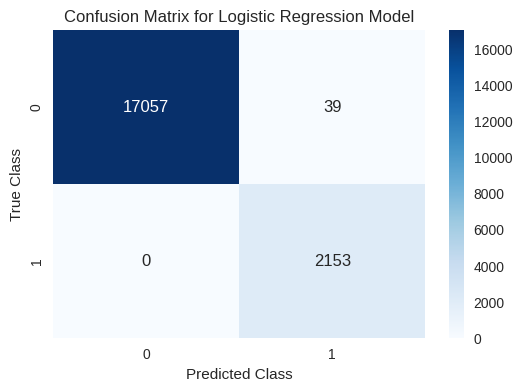

In [ ]:
plt.figure(figsize=(6, 4))
cf_matrix = confusion_matrix(y_test, precip_predict)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='0')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [ ]:
print(classification_report(y_test, precip_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17096
           1       0.98      1.00      0.99      2153

    accuracy                           1.00     19249
   macro avg       0.99      1.00      0.99     19249
weighted avg       1.00      1.00      1.00     19249



In [ ]:
user_input_temp = int(input('Enter the temperature in celcius : '))
user_input_humid = float(input('Enter the humidity : '))
user_input_visiblity = float(input('Enter the Visibility : '))


result2 = logmodel.predict([[user_input_temp, user_input_humid, user_input_visiblity]])
result2 = lb.inverse_transform(result2)
print("Expected Precipitation Type is", result2[0])

Enter the temperature in celcius : 78
Enter the humidity : 77
Enter the Visibility : 89
Expected Precipitation Type is rain


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Classification Model - Predicting Summary Feature**

In [ ]:
df_preprocessed['Month'] = df_preprocessed['Date'].dt.month

In [ ]:
le = LabelEncoder()

df_preprocessed['Summary Encoded'] = le.fit_transform(df_preprocessed.loc[:, 'Summary'])

x = df_preprocessed.loc[:, ['Temperature (C)', 'Humidity', 'Visibility (km)', 'Pressure (millibars)', 'Wind Speed (km/h)', 'Month']]
y = df_preprocessed.loc[:, 'Summary Encoded']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x, y = smote.fit_resample(x, y)

x.shape[0], y.shape[0]

(161450, 161450)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier  = GaussianNB()

classifier.fit(x_train, y_train)
summary_predict = classifier.predict(x_test)

print("Accuracy of Naive Bayes Algorithm is {}".format(round(accuracy_score(y_test, summary_predict), 2)*100))

Accuracy of Naive Bayes Algorithm is 50.0


**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
summary_predict = knn.predict(x_test)

print("Accuracy of KNN Algorithm is " + '%.2f' %(round(accuracy_score(y_test, summary_predict), 2)*100))

Accuracy of KNN Algorithm is 63.00


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(max_depth=55, random_state=1)

rforest.fit(x_train, y_train)
summary_predict = rforest.predict(x_test)

print("Accuracy of Random Forest Algorithm is", round(accuracy_score(y_test, summary_predict), 2)*100)

Accuracy of Random Forest Algorithm is 76.0


In [ ]:
user_input = [27, 0.85, 6, 1003, 14, 4]

result3 = rforest.predict([user_input])
result3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
print(le.inverse_transform(result3))

['Mostly Cloudy']


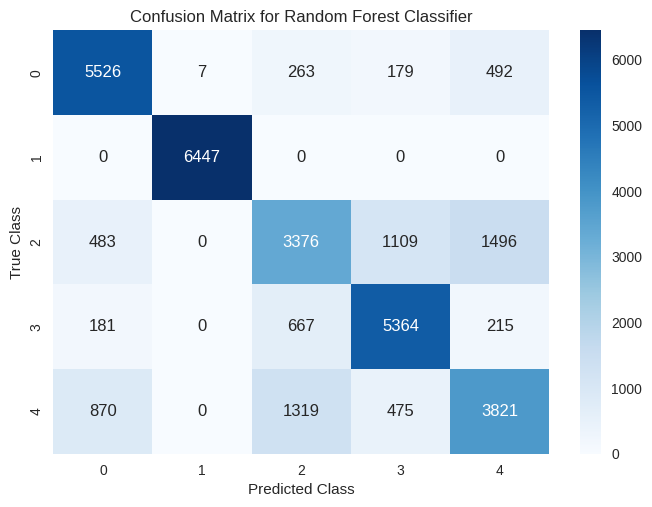

In [ ]:
plt.title('Confusion Matrix for Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, summary_predict), annot=True, fmt='0', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
print(classification_report(y_test, summary_predict))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      6467
           1       1.00      1.00      1.00      6447
           2       0.60      0.52      0.56      6464
           3       0.75      0.83      0.79      6427
           4       0.63      0.59      0.61      6485

    accuracy                           0.76     32290
   macro avg       0.75      0.76      0.76     32290
weighted avg       0.75      0.76      0.76     32290



<b>Summary</b><br>
<li>We have performed Exploratory Data Analysis and shortlised key features.<br>
&emsp; We have performed Data Preprocessing on unclean observations.</li>
<li>Then, we built Linear Regression Model to predict Tempearture.</li>
<li>We built Logistic Regression Model to predict precipitation type.</li>
<li>Then, we built Random Forest Model to predict Summary.</li>
<li>Website is developed by using FLASK Framework to make project accessible and easy-to-use for end users.</li>

<b>Conclusion :</b> Thus, we have successfully completed Project "Weather Forecasting using ML".